In [1]:
from modules.cn_allocation import Makela08_alloc_parameter
from modules.cn_allocation import Makela08_alloc_symbsolver
import numpy as np
import matplotlib.pyplot as plt

params_dict = Makela08_alloc_parameter.get_param_dict(dict_name="params_makela08_pine")

In [2]:
# For testing purposes
Nup_max_specific = 5
# Photosyn_lightsat = 2

# Wr = psi_r * Wf

psi_r_realroots_list = []
psi_r_solver = Makela08_alloc_symbsolver.PsiRCubicEqnSolver(params_dict)
for i in np.arange(0.01, 0.03, 0.0001):  # Nconc_foliage
    
    Photosyn_lightsat = psi_r_solver.solve_photosyn_rate_lightsat_Ndep(i)
    
    psi_r_roots, psi_r_realroots_conv, psi_r_realroots_conv_positive, coeff_list = psi_r_solver.solve_cubic_eqn_numeric(Nup_max_specific, Photosyn_lightsat, i)
    
    psi_r_realroots_list.append([i, psi_r_realroots_conv_positive, Photosyn_lightsat])
    

In [3]:
# Solve G using psi_r
# Use DM_foliage_C
G_result_list = []

for indv_combination in psi_r_realroots_list:
    Nconc_foliage = indv_combination[0]
    psi_r_real = indv_combination[1][0]
    Photosyn_lightsat_forsolve = indv_combination[2]
    
    Wf_solver = Makela08_alloc_symbsolver.DryMassFoliageSolver(
        Nup_max_specific, Photosyn_lightsat_forsolve, params_dict,
        Nconc_foliage=Nconc_foliage, use_numeric_Nconc_foliage=True
    )
    DM_foliage_C = Wf_solver.solve_carbon(psi_r_real)[0]
    # DM_foliage_N = Wf_solver.solve_nitrogen(psi_r_real)[0]
    
    G_solver = Makela08_alloc_symbsolver.BiomassProductionSolver(
        params_dict,
        Nconc_foliage=Nconc_foliage, use_numeric_Nconc_foliage=True
    )
    
    G_C = G_solver.solve_total_biomass_production(DM_foliage_C, psi_r_real)
    # G_N = G_solver.solve_total_biomass_production(DM_foliage_N, psi_r_real)
    
    G_result_list.append([Nconc_foliage, psi_r_real, DM_foliage_C, G_C])
    
    

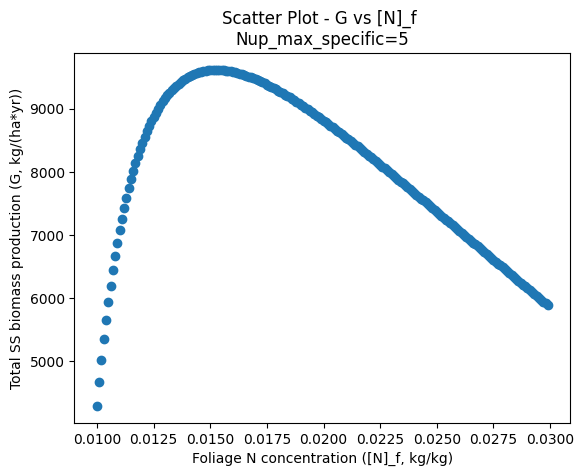

In [4]:
# Plotting: Nconc_foliage=x, G_C=y, under certain Nup_max_specific and Photosyn_lightsat
x = [pair[0] for pair in G_result_list]
y = [pair[-1] for pair in G_result_list]
plt.scatter(x, y)  # Plot x against y as a scatter plot
plt.title('Scatter Plot - G vs [N]_f \nNup_max_specific=%s' %
          Nup_max_specific)
plt.xlabel('Foliage N concentration ([N]_f, kg/kg)')
plt.ylabel('Total SS biomass production (G, kg/(ha*yr))')
plt.show()  # Display the plot

In [5]:
params_dict = Makela08_alloc_parameter.get_param_dict(dict_name="params_makela08_pine")
psi_r_solver = Makela08_alloc_symbsolver.PsiRCubicEqnSolver(params_dict)
G_numeric_solver = Makela08_alloc_symbsolver.BiomassProductionOptimizerNumeric(psi_r_solver, params_dict)
Nconc_foliage_maxG, maxG_value = G_numeric_solver.optimize_total_biomass_production()

In [8]:
Nconc_foliage_maxG, maxG_value

(array([0.01524904]), -9613.353305457658)